In [17]:
!export PYTHONPATH="${PYTHONPATH}:/CP_GLIMPSE/Tuning-CLIP"
!export PYTHONPATH="${PYTHONPATH}:/CP_GLIMPSE/Glimpse-Annotation-Platform"

In [ ]:
import json
import os

def extract_dataset(json_file, image_dir):
    """
    Extract image paths and captions from the dataset JSON file.
    
    Args:
        json_file (str): Path to the JSON file containing dataset information.
        image_dir (str): Directory where images are stored.
    
    Returns:
        tuple: (image_paths, captions) where image_paths is a list of image file paths
               and captions is a list of corresponding captions.
    """
    with open(json_file, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    image_paths = []
    captions = []
    
    for source in data['data_sources']:
        for file in source['files']:
            image_paths.append(os.path.join(image_dir, file['file_path']))
            captions.append(file['captions'][0]['text'])
    
    return image_paths, captions

In [16]:
current_path = os.getcwd()
json_file = f"{current_path}/Glimpse-Annotation-Platform/data/raw/UIT-OpenViIC-dataset/UIT-OpenViIC-dataset.json"
image_dir = f"{current_path}/Glimpse-Annotation-Platform/data/raw/UIT-OpenViIC-dataset/images/"

image_paths, captions = extract_dataset(json_file, image_dir)

print(f"Extracted {len(image_paths)} image-caption pairs")
for i in range(min(5, len(image_paths))):
    print(f"Image: {image_paths[i]}, Caption: {captions[i]}")

Extracted 13100 image-caption pairs
Image: /Users/quanghuypham/Desktop/CP_Glimpse/Glimpse-Annotation-Platform/data/raw/UIT-OpenViIC-dataset/images/./images/00000006091.jpg, Caption: một ngôi nhà màu vàng có các sợi dây leo màu xanh quấn xung quanh
Image: /Users/quanghuypham/Desktop/CP_Glimpse/Glimpse-Annotation-Platform/data/raw/UIT-OpenViIC-dataset/images/./images/00000006092.jpg, Caption: một người đàn ông mặc áo màu trắng đeo cặp màu đen đang cúi đầu xuống
Image: /Users/quanghuypham/Desktop/CP_Glimpse/Glimpse-Annotation-Platform/data/raw/UIT-OpenViIC-dataset/images/./images/00000006093.png, Caption: một người đàn ông mặc áo khoác màu xanh lá đang nhìn một người đàn ông mặc áo khoác màu xanh lá
Image: /Users/quanghuypham/Desktop/CP_Glimpse/Glimpse-Annotation-Platform/data/raw/UIT-OpenViIC-dataset/images/./images/00000006094.jpg, Caption: một toà nhà hình tròn màu xanh nước biển nằm ở giữa một bãi đất trống
Image: /Users/quanghuypham/Desktop/CP_Glimpse/Glimpse-Annotation-Platform/data

In [19]:
!pip install tqdm

    fonttools (>=3.0<4.0) ; (python_version < "3") and extra == 'with-fonttools'
              ~~~~~~^
    extract-msg (<=0.29.*)
                 ~~~~~~~^

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import json
import os
from tqdm import tqdm

current_path = os.getcwd()
json_file = f"{current_path}/data/raw/UIT-OpenViIC-dataset/UIT-OpenViIC-dataset.json"
image_dir = f"{current_path}/data/raw/UIT-OpenViIC-dataset/images/"

# Load the original dataset
with open(json_file, "r", encoding="utf-8") as f:
    dataset = json.load(f)

# Prepare the output list
image_text_pairs = []

# Loop through each file entry
for item in tqdm(dataset["data_sources"][0]["files"], desc="Processing files"):
    image_path = item["file_path"]
    for caption in item["captions"]:
        image_text_pairs.append({
            "image_path": image_path,
            "caption": caption["text"]
        })

# Save to a new JSON file
with open("image_text_pairs.json", "w", encoding="utf-8") as f:
    json.dump(image_text_pairs, f, ensure_ascii=False, indent=2)

print(f"Extracted {len(image_text_pairs)} image-text pairs.")

Processing files: 100%|██████████| 13100/13100 [00:00<00:00, 340979.16it/s]


Extracted 61241 image-text pairs.


In [1]:
pwd

'/Users/quanghuypham/Desktop/CP_Glimpse/Glimpse-Annotation-Platform'

In [ ]:
import json
import os

# Define the path to the dev annotation file
dev_annotation_path = "/Users/quanghuypham/Desktop/CP_Glimpse/Glimpse-Annotation-Platform/data/raw/UIT-OpenViIC-dataset/uit-openviic-annotation-dev.json"
test_annotation_path = "/Users/quanghuypham/Desktop/CP_Glimpse/Glimpse-Annotation-Platform/data/raw/UIT-OpenViIC-dataset/uit-openviic-annotation-test.json"
train_annotation_path = "/Users/quanghuypham/Desktop/CP_Glimpse/Glimpse-Annotation-Platform/data/raw/UIT-OpenViIC-dataset/uit-openviic-annotation-train.json"

try:
    with open(dev_annotation_path, "r", encoding="utf-8") as f:
        dev_annotations = json.load(f)
    
    # Display basic information about the file
    print(f"Successfully loaded dev annotation file")
    print(f"Number of images in dev set: {len(dev_annotations)}")
    
    # Display a sample of the data structure (first item)
    if dev_annotations:
        first_key = next(iter(dev_annotations))
        print(f"\nSample entry for image {first_key}:")
        print(json.dumps(dev_annotations[first_key], indent=2, ensure_ascii=False)[:500] + "...")
    else:
        print("The dev annotation file is empty")
        
except FileNotFoundError:
    print(f"Error: File not found at {dev_annotation_path}")
except json.JSONDecodeError:
    print(f"Error: File is not valid JSON format")
except Exception as e:
    print(f"Error: {str(e)}")


Successfully loaded dev annotation file
Number of images in dev set: 2011

Sample entry for image 00000000400.jpg:
{
  "captions": [
    "một cô gái tóc dài màu đen đang ngồi trên chiếc ghế sofa màu hồng với một vài cây xương rồng xung quanh",
    "một cô gái người nước ngoài mặc váy đen đang ngồi trước một bức tường màu hồng",
    "một cô gái mặc đầm đen đang ngồi trên một chiếc ghế màu hồng",
    "một cô gái bận đầm đen đang xõa tóc và  ngồi trên băng ghế màu hồng có trồng xương rồng đằng sau",
    "có một cô gái đang ngồi sau lưng cô là màu hồng"
  ]
}...


In [15]:
with open(dev_annotation_path, "r", encoding="utf-8") as f: dev_annotations = json.load(f)

dev_annotations

{'00000000400.jpg': {'captions': ['một cô gái tóc dài màu đen đang ngồi trên chiếc ghế sofa màu hồng với một vài cây xương rồng xung quanh',
   'một cô gái người nước ngoài mặc váy đen đang ngồi trước một bức tường màu hồng',
   'một cô gái mặc đầm đen đang ngồi trên một chiếc ghế màu hồng',
   'một cô gái bận đầm đen đang xõa tóc và  ngồi trên băng ghế màu hồng có trồng xương rồng đằng sau',
   'có một cô gái đang ngồi sau lưng cô là màu hồng']},
 '00000000401.jpg': {'captions': ['khung cảnh một túp nhà tranh có dòng sông và khu rừng đằng sau',
   'một cây cầu gỗ bắc ngang qua dòng sông ở một vùng quê và bầu trời thì đang âm u',
   'một cây cầu gỗ bắc qua sông dấn đến một ngôi nhà bao quanh bởi rất nhiều cây xanh',
   'một người cầm dù đi qua một cây cầu gỗ bắc ngang sông khi trời âm u',
   'có một cây cầu bằng gỗ một nhà tranh bên phải bầu trời âm u']},
 '00000000402.jpg': {'captions': ['những bát đồ ăn và những chén nước chấm và bát nước lèo',
   'hai chén có lòng heo đã được nấu và

In [19]:
import json

# Load the image-text pairs
with open("image_text_pairs.json", "r", encoding="utf-8") as f:
    all_pairs = json.load(f)


dev_annotation_path = f"{current_path}/data/raw/UIT-OpenViIC-dataset/uit-openviic-annotation-dev.json"
test_annotation_path = f"{current_path}/data/raw/UIT-OpenViIC-dataset/uit-openviic-annotation-test.json"
train_annotation_path = f"{current_path}/data/raw/UIT-OpenViIC-dataset/uit-openviic-annotation-train.json"

# Load file names from annotation sets
def load_image_filenames(annotation_file):
    with open(annotation_file, "r", encoding="utf-8") as f:
        data = json.load(f)
        return set(data.keys())  # file names like '00000006091.jpg'

train_files = load_image_filenames(train_annotation_path)
dev_files = load_image_filenames(dev_annotation_path)
test_files = load_image_filenames(test_annotation_path)

# Helper to extract base file name
def get_filename(path):
    return path.split("/")[-1]

# Initialize splits
train_data, dev_data, test_data = [], [], []

# Split data
for pair in all_pairs:
    filename = get_filename(pair["image_path"])
    if filename in train_files:
        train_data.append(pair)
    elif filename in dev_files:
        dev_data.append(pair)
    elif filename in test_files:
        test_data.append(pair)

# Save to new JSON files
with open("train.json", "w", encoding="utf-8") as f:
    json.dump(train_data, f, ensure_ascii=False, indent=2)
with open("dev.json", "w", encoding="utf-8") as f:
    json.dump(dev_data, f, ensure_ascii=False, indent=2)
with open("test.json", "w", encoding="utf-8") as f:
    json.dump(test_data, f, ensure_ascii=False, indent=2)

print(f"Split complete ✅: {len(train_data)} train, {len(dev_data)} dev, {len(test_data)} test pairs.")


Split complete ✅: 41238 train, 10002 dev, 10001 test pairs.


# OpenViVQA

In [1]:
import os

# Path to the dev-images directory
dev_images_path = "/Users/quanghuypham/Desktop/CP_Glimpse/TuningModels/data/OpenViVQA-dataset/dev-images"

# Extract all image filenames from the directory
def extract_image_filenames(directory):
    if not os.path.exists(directory):
        print(f"Directory not found: {directory}")
        return []
    
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']
    image_filenames = []
    
    for filename in os.listdir(directory):
        if any(filename.lower().endswith(ext) for ext in image_extensions):
            image_filenames.append(filename)
    
    return image_filenames

# Get all image filenames
dev_image_filenames = extract_image_filenames(dev_images_path)

# Print the results
print(f"Found {len(dev_image_filenames)} images in the dev-images directory.")
if dev_image_filenames:
    print("Sample of image filenames:")
    for filename in dev_image_filenames[:5]:  # Show first 5 as a sample
        print(f"  - {filename}")


Found 1070 images in the dev-images directory.
Sample of image filenames:
  - 000000003469.jpg
  - 000000000160.jpg
  - 000000003327.jpg
  - 000000003441.jpg
  - 000000000148.jpg


In [3]:
dev_image_filenames[0]

'000000003469.jpg'

In [4]:
import os
import shutil
from tqdm import tqdm

# Define paths
base_dir = "/Users/quanghuypham/Desktop/CP_Glimpse/TuningModels/data/OpenViVQA-dataset"
training_images_dir = os.path.join(base_dir, "training-images")
dev_images_dir = os.path.join(base_dir, "dev-images")
test_images_dir = os.path.join(base_dir, "test-images")
target_dir = os.path.join(base_dir, "images")

# Create target directory if it doesn't exist
if not os.path.exists(target_dir):
    os.makedirs(target_dir)
    print(f"Created directory: {target_dir}")

# Function to copy images from source to target directory
def copy_images(source_dir, target_dir):
    if not os.path.exists(source_dir):
        print(f"Source directory not found: {source_dir}")
        return 0
    
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']
    count = 0
    
    # Get list of files to copy
    files_to_copy = []
    for filename in os.listdir(source_dir):
        if any(filename.lower().endswith(ext) for ext in image_extensions):
            files_to_copy.append(filename)
    
    # Copy files with progress bar
    for filename in tqdm(files_to_copy, desc=f"Processing files from {os.path.basename(source_dir)}"):
        source_path = os.path.join(source_dir, filename)
        target_path = os.path.join(target_dir, filename)
        
        # Copy only if file doesn't exist in target or is different
        if not os.path.exists(target_path) or os.path.getsize(source_path) != os.path.getsize(target_path):
            shutil.copy2(source_path, target_path)
            count += 1
    
    return count

# Copy images from all three directories
train_copied = copy_images(training_images_dir, target_dir)
dev_copied = copy_images(dev_images_dir, target_dir)
test_copied = copy_images(test_images_dir, target_dir)

# Count total images in target directory
total_images = len([f for f in os.listdir(target_dir) 
                   if os.path.isfile(os.path.join(target_dir, f)) and 
                   any(f.lower().endswith(ext) for ext in ['.jpg', '.jpeg', '.png', '.gif', '.bmp'])])

print(f"\nMerge complete ✅")
print(f"Copied {train_copied} training images, {dev_copied} dev images, and {test_copied} test images")
print(f"Total images in merged directory: {total_images}")


Created directory: /Users/quanghuypham/Desktop/CP_Glimpse/TuningModels/data/OpenViVQA-dataset/images


Processing files from test-images: 100%|██████████| 1000/1000 [00:00<00:00, 1324.25it/s]


Merge complete ✅
Copied 9129 training images, 1070 dev images, and 1000 test images
Total images in merged directory: 11199


In [5]:
# Check total length of image paths from JSON files
import json

def count_unique_images_in_json(json_file_path):
    try:
        with open(json_file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        
        # Extract unique image paths
        unique_images = set()
        for item in data:
            if 'image_path' in item:
                unique_images.add(item['image_path'])
        
        return len(unique_images)
    except Exception as e:
        print(f"Error processing {json_file_path}: {e}")
        return 0

# Paths to JSON files
train_json_path = 'data/OpenViVQA-dataset/train.json'
dev_json_path = 'data/OpenViVQA-dataset/dev.json'
test_json_path = 'data/OpenViVQA-dataset/test.json'

# Count unique images in each file
train_count = count_unique_images_in_json(train_json_path)
dev_count = count_unique_images_in_json(dev_json_path)
test_count = count_unique_images_in_json(test_json_path)

print("\nImage count in JSON files:")
print(f"Train JSON: {train_count} unique images")
print(f"Dev JSON: {dev_count} unique images")
print(f"Test JSON: {test_count} unique images")
print(f"Total across all JSON files: {train_count + dev_count + test_count} unique images")



Image count in JSON files:
Train JSON: 9129 unique images
Dev JSON: 1070 unique images
Test JSON: 1000 unique images
Total across all JSON files: 11199 unique images


# Landmark

In [1]:
import os
import glob
from tqdm import tqdm

# Path to the LANDMARK-IN-VIETNAM directory
landmark_dir = 'data/LANDMARK-IN-VIETNAM'

# Function to get all image files recursively
def get_all_images(directory):
    # Common image extensions
    image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.gif', '*.bmp', '*.tiff']
    
    all_images = []
    
    # Recursively search for images with each extension
    for ext in image_extensions:
        # Use glob.glob with recursive=True to search in all subdirectories
        image_paths = glob.glob(os.path.join(directory, '**', ext), recursive=True)
        all_images.extend(image_paths)
    
    # Extract just the filenames from the full paths
    image_names = [os.path.basename(path) for path in all_images]
    
    return image_names, all_images

# Get all image names and paths
landmark_image_names, landmark_image_paths = get_all_images(landmark_dir)

print(f"Found {len(landmark_image_names)} images in the LANDMARK-IN-VIETNAM directory")

# Display the first few image names if available
if landmark_image_names:
    print("\nSample image names:")
    for name in landmark_image_names[:5]:
        print(f"- {name}")


Found 5675 images in the LANDMARK-IN-VIETNAM directory

Sample image names:
- fdbd25036b23f1b2.jpg
- 261eb5b86ad1b395.jpg
- 3ebc8032c6ed1616.jpg
- a2e9a041a4d2eed9.jpg
- 2be50d21ba5687c4.jpg


In [2]:
landmark_image_names

['fdbd25036b23f1b2.jpg',
 '261eb5b86ad1b395.jpg',
 '3ebc8032c6ed1616.jpg',
 'a2e9a041a4d2eed9.jpg',
 '2be50d21ba5687c4.jpg',
 '360192abd54b0c20.jpg',
 'a613f7b8c4296436.jpg',
 '2db0c201c7cac972.jpg',
 'e02f3a8737b382b3.jpg',
 '3a94627c2e7ff93d.jpg',
 '32ae2cb789bd3a57.jpg',
 'f60d7162dce00cf4.jpg',
 '0cf4068792730e8c.jpg',
 '668a9bf9b1e05906.jpg',
 '5b2639f09fc889e3.jpg',
 'a93faf94c1f712f1.jpg',
 '7b2a256ee6e22e4b.jpg',
 'ba12bad746ec1a5e.jpg',
 '9dd436522b16836d.jpg',
 '4c59e8ae614057e5.jpg',
 '40242388095230d7.jpg',
 'fc21f3822f62ee3c.jpg',
 '68742798f48e87d3.jpg',
 'dec8b84443671214.jpg',
 '43351ac7d3a0e7b6.jpg',
 '58147d0a97dc2f6c.jpg',
 '334adc07374a0aaf.jpg',
 '5b005c25d8dabb73.jpg',
 'a19d00c4ef081cd5.jpg',
 '87d010756377444c.jpg',
 'c874157ed7ee15dc.jpg',
 'd4dc2062061a2e31.jpg',
 'a8a2be0386b8e491.jpg',
 '8c2b42c962291ddb.jpg',
 '6e832ed77a090734.jpg',
 'a7b2cf6cffb631cb.jpg',
 'cac4c34463be2754.jpg',
 '699ad48a2250c8da.jpg',
 'bd7735d62ec3a189.jpg',
 '3442f2ea6fba5e4b.jpg',


In [9]:
import json

# Load the LANDMARK-IN-VIETNAM_5caption.json file
with open('data/LANDMARK-IN-VIETNAM_5caption.json', 'r') as f:
    landmark_data = json.load(f)

# Extract file paths from the JSON data
landmark_file_paths = []

# Check if the expected structure exists
if 'data_sources' in landmark_data and len(landmark_data['data_sources']) > 0:
    # Iterate through all data sources
    for source in landmark_data['data_sources']:
        # Check if the source has files
        if 'files' in source:
            # Extract file paths from each file entry
            for file_entry in source['files']:
                if 'file_path' in file_entry:
                    landmark_file_paths.append(file_entry['file_path'])

print(f"Found {len(landmark_file_paths)} file paths in the LANDMARK-IN-VIETNAM_5caption.json file")

# Display the first few file paths if available
if landmark_file_paths:
    print("\nSample file paths:")
    for path in landmark_file_paths[:5]:
        print(f"- {path}")


Found 5674 file paths in the LANDMARK-IN-VIETNAM_5caption.json file

Sample file paths:
- ./4986/d94c15e0fa712727.jpg
- ./4986/e41ba2a8517359c8.jpg
- ./4986/164ca8c6089aac4f.jpg
- ./4986/082d082b9f39afe5.jpg
- ./4986/657ddb80ba51c9fc.jpg


In [11]:
import random

# Set a random seed for reproducibility
random.seed(42)

# Shuffle the file paths to ensure randomness
random_landmark_file_paths = landmark_file_paths.copy()
random.shuffle(random_landmark_file_paths)

# Calculate the sizes for each split based on the 7:2:1 ratio
total_files = len(random_landmark_file_paths)
train_size = int(total_files * 0.7)
val_size = int(total_files * 0.2)
test_size = total_files - train_size - val_size  # Ensure all files are used

# Split the file paths
landmark_train = random_landmark_file_paths[:train_size]
landmark_val = random_landmark_file_paths[train_size:train_size+val_size]
landmark_test = random_landmark_file_paths[train_size+val_size:]

# Print the split information
print(f"Total files: {total_files}")
print(f"Train set: {len(landmark_train)} files ({len(landmark_train)/total_files:.1%})")
print(f"Validation set: {len(landmark_val)} files ({len(landmark_val)/total_files:.1%})")
print(f"Test set: {len(landmark_test)} files ({len(landmark_test)/total_files:.1%})")

# Display a few examples from each set
print("\nSample train files:")
for path in landmark_train[:3]:
    print(f"- {path}")

print("\nSample validation files:")
for path in landmark_val[:3]:
    print(f"- {path}")

print("\nSample test files:")
for path in landmark_test[:3]:
    print(f"- {path}")


Total files: 5674
Train set: 3971 files (70.0%)
Validation set: 1134 files (20.0%)
Test set: 569 files (10.0%)

Sample train files:
- ./19534/bbb3f5cb0e687def.jpg
- ./44280/9b52df191527aae9.jpg
- ./144275/1d39341aa3d0ae69.jpg

Sample validation files:
- ./107747/752adad80ab27175.jpg
- ./151011/fad8a16d30624c1f.jpg
- ./19621/9a671ad8cdd1f9bb.jpg

Sample test files:
- ./94769/6b86809899e04cc8.jpg
- ./93932/c9b869f1dff23066.jpg
- ./152437/ee2dd65a7fbe669c.jpg


In [19]:
import json
import os

def get_landmark_captions(json_file_path='data/LANDMARK-IN-VIETNAM_5caption.json'):
    """
    Extract captions from the LANDMARK-IN-VIETNAM_5caption.json file
    and create a mapping of filenames to their captions.
    
    Args:
        json_file_path (str): Path to the JSON file containing captions
        
    Returns:
        dict: Dictionary mapping filenames to their captions
    """
    # Load the JSON data
    with open(json_file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    filename_to_captions = {}
    
    # Process each file in the data sources
    for source in data.get('data_sources', []):
        for file_info in source.get('files', []):
            file_name = file_info.get('file_path')
            captions = []
            
            # Collect all captions for this file
            for caption_info in file_info.get('captions', []):
                caption_text = caption_info.get('text')
                captions.append(caption_text)
            
            if captions:
                filename_to_captions[file_name] = captions
    
    return filename_to_captions

def create_caption_dataset(file_paths, filename_to_captions):
    """
    Create a dataset of image paths and captions for the given file paths.
    
    Args:
        file_paths (list): List of image file paths
        filename_to_captions (dict): Dictionary mapping filenames to captions
        
    Returns:
        list: List of dictionaries with image_path and caption
    """
    dataset = []
    
    for file_name in file_paths:
        if file_name in filename_to_captions:
            entry = {
                "image_path": f"./images/{file_name}",
                "caption": filename_to_captions[file_name]
            }
            dataset.append(entry)
    
    return dataset

# Get the mapping of filenames to captions
filename_to_captions = get_landmark_captions()

# Create datasets for train, validation, and test splits
train_dataset = create_caption_dataset(landmark_train, filename_to_captions)
val_dataset = create_caption_dataset(landmark_val, filename_to_captions)
test_dataset = create_caption_dataset(landmark_test, filename_to_captions)

# Save the datasets to JSON files
with open('train.json', 'w', encoding='utf-8') as f:
    json.dump(train_dataset, f, ensure_ascii=False, indent=2)

with open('val.json', 'w', encoding='utf-8') as f:
    json.dump(val_dataset, f, ensure_ascii=False, indent=2)

with open('test.json', 'w', encoding='utf-8') as f:
    json.dump(test_dataset, f, ensure_ascii=False, indent=2)

print(f"Train dataset saved with {len(train_dataset)} entries")
print(f"Validation dataset saved with {len(val_dataset)} entries")
print(f"Test dataset saved with {len(test_dataset)} entries")

print("\nSample entries from train.json:")
for entry in train_dataset[:2]:
    print(entry)


Train dataset saved with 3969 entries
Validation dataset saved with 1133 entries
Test dataset saved with 569 entries

Sample entries from train.json:
{'image_path': './images/./19534/bbb3f5cb0e687def.jpg', 'caption': ['Một con sao biển màu đỏ cam đang bám vào một tảng đá lớn màu xanh lam.', 'Nhiều cụm san hô nhỏ màu xanh nhạt mọc dày đặc trên bề mặt đá.', 'Các cấu trúc đá và san hô tạo thành một môi trường sống dưới nước phức tạp.', 'Một số loại san hô có hình dạng ống dài và mảnh, màu trắng xám.', 'Ánh sáng xanh chiếu xuống tạo ra một không gian huyền ảo dưới đáy biển.']}
{'image_path': './images/./44280/9b52df191527aae9.jpg', 'caption': ['Nhiều nhân viên đang đứng sau quầy trưng bày các sản phẩm trang sức lấp lánh.', 'Các tủ kính trưng bày chứa đầy vòng cổ, nhẫn và các loại trang sức khác nhau.', 'Ánh sáng từ đèn trần chiếu xuống làm nổi bật các sản phẩm được bày bán.', 'Một số khách hàng đang xem xét các mặt hàng được trưng bày trong tủ kính.', 'Phía sau khu vực trang sức là các gia

In [20]:
# Function to transform the dataset format
def transform_dataset_format(dataset):
    """
    Transform the dataset format to have one entry per caption
    
    Args:
        dataset (list): List of dictionaries with image_path and caption list
        
    Returns:
        list: List of dictionaries with image_path and single caption in a list
    """
    transformed_dataset = []
    
    for entry in dataset:
        image_path = entry["image_path"]
        captions = entry["caption"]
        
        # Create a new entry for each caption
        for caption in captions:
            transformed_entry = {
                "image_path": image_path,
                "caption": [caption]
            }
            transformed_dataset.append(transformed_entry)
    
    return transformed_dataset

# Transform datasets
transformed_train = transform_dataset_format(train_dataset)
transformed_val = transform_dataset_format(val_dataset)
transformed_test = transform_dataset_format(test_dataset)

# Save the transformed datasets to JSON files
with open('train_transformed.json', 'w', encoding='utf-8') as f:
    json.dump(transformed_train, f, ensure_ascii=False, indent=2)

with open('val_transformed.json', 'w', encoding='utf-8') as f:
    json.dump(transformed_val, f, ensure_ascii=False, indent=2)

with open('test_transformed.json', 'w', encoding='utf-8') as f:
    json.dump(transformed_test, f, ensure_ascii=False, indent=2)

print(f"\nTransformed train dataset saved with {len(transformed_train)} entries")
print(f"Transformed validation dataset saved with {len(transformed_val)} entries")
print(f"Transformed test dataset saved with {len(transformed_test)} entries")

print("\nSample entries from transformed train.json:")
for entry in transformed_train[:5]:
    print(entry)



Transformed train dataset saved with 19844 entries
Transformed validation dataset saved with 5667 entries
Transformed test dataset saved with 2845 entries

Sample entries from transformed train.json:
{'image_path': './images/./19534/bbb3f5cb0e687def.jpg', 'caption': ['Một con sao biển màu đỏ cam đang bám vào một tảng đá lớn màu xanh lam.']}
{'image_path': './images/./19534/bbb3f5cb0e687def.jpg', 'caption': ['Nhiều cụm san hô nhỏ màu xanh nhạt mọc dày đặc trên bề mặt đá.']}
{'image_path': './images/./19534/bbb3f5cb0e687def.jpg', 'caption': ['Các cấu trúc đá và san hô tạo thành một môi trường sống dưới nước phức tạp.']}
{'image_path': './images/./19534/bbb3f5cb0e687def.jpg', 'caption': ['Một số loại san hô có hình dạng ống dài và mảnh, màu trắng xám.']}
{'image_path': './images/./19534/bbb3f5cb0e687def.jpg', 'caption': ['Ánh sáng xanh chiếu xuống tạo ra một không gian huyền ảo dưới đáy biển.']}


In [3]:
# Randomize the position of image-text pairs in the dev.json file
import json
import random

# Path to the dev.json file
dev_json_path = '/home/researcher/huypq69/TuningModels/json_data/train.json'

# Load the dev.json file
try:
    with open(dev_json_path, 'r', encoding='utf-8') as f:
        dev_data = json.load(f)
    
    # Print original length
    print(f"Original dev.json contains {len(dev_data)} image-text pairs")
    
    # Shuffle the data
    random.shuffle(dev_data)
    
    # Save the shuffled data back to the file
    with open(dev_json_path, 'w', encoding='utf-8') as f:
        json.dump(dev_data, f, ensure_ascii=False, indent=2)
    
    print(f"Successfully randomized the positions of image-text pairs in {dev_json_path}")
    print(f"Shuffled dev.json still contains {len(dev_data)} image-text pairs")
    
except Exception as e:
    print(f"Error processing dev.json: {e}")


Original dev.json contains 19844 image-text pairs
Successfully randomized the positions of image-text pairs in /home/researcher/huypq69/TuningModels/json_data/train.json
Shuffled dev.json still contains 19844 image-text pairs


Processing JSON files: 100%|██████████| 3/3 [00:00<00:00, 94.07it/s]

Average maximum caption length: 14.53 words
Median maximum caption length: 14.00 words
Minimum of maximum caption lengths: 7 words
Maximum of maximum caption lengths: 26 words
Standard deviation of maximum caption lengths: 2.02 words


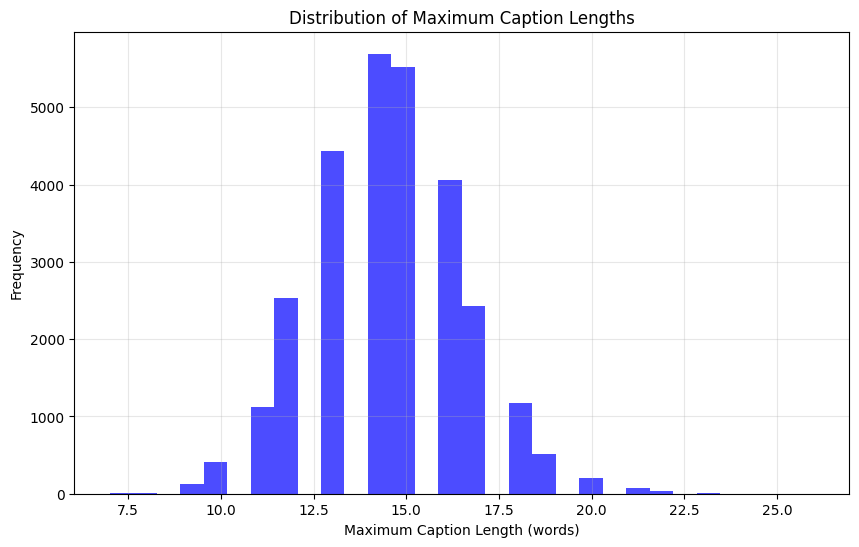

In [12]:
import json
import os
import numpy as np
from tqdm import tqdm

# Path to the JSON data directory
json_data_dir = '/home/researcher/huypq69/2ndrun/TuningModels/json_data'


# Function to calculate average max length of captions
def calculate_avg_max_caption_length(json_dir):
    max_lengths = []
    
    # Get all JSON files in the directory
    json_files = [f for f in os.listdir(json_dir) if f.endswith('.json')]
    
    for json_file in tqdm(json_files, desc="Processing JSON files"):
        file_path = os.path.join(json_dir, json_file)
        
        try:
            # Load the JSON file
            with open(file_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
            
            # Handle different JSON formats
            if isinstance(data, list):
                # Format like in test.json: list of dictionaries with "image_path" and "caption" keys
                for item in data:
                    if "caption" in item and item["caption"]:
                        # Get the length of each caption (in words)
                        caption_lengths = [len(caption.split()) for caption in item["caption"]]
                        # Store the maximum length for this image
                        max_lengths.append(max(caption_lengths))
            elif isinstance(data, dict):
                # Format like in the previous code: dictionary with image_id keys
                for image_id, image_data in data.items():
                    if 'captions' in image_data and image_data['captions']:
                        # Get the length of each caption (in words)
                        caption_lengths = [len(caption.split()) for caption in image_data['captions']]
                        # Store the maximum length for this image
                        max_lengths.append(max(caption_lengths))
        
        except Exception as e:
            print(f"Error processing {json_file}: {e}")
    
    # Calculate statistics
    if max_lengths:
        avg_max_length = np.mean(max_lengths)
        median_max_length = np.median(max_lengths)
        min_max_length = np.min(max_lengths)
        max_max_length = np.max(max_lengths)
        std_max_length = np.std(max_lengths)
        
        print(f"Average maximum caption length: {avg_max_length:.2f} words")
        print(f"Median maximum caption length: {median_max_length:.2f} words")
        print(f"Minimum of maximum caption lengths: {min_max_length} words")
        print(f"Maximum of maximum caption lengths: {max_max_length} words")
        print(f"Standard deviation of maximum caption lengths: {std_max_length:.2f} words")
        
        # Plot histogram of max lengths
        try:
            import matplotlib.pyplot as plt
            plt.figure(figsize=(10, 6))
            plt.hist(max_lengths, bins=30, alpha=0.7, color='blue')
            plt.title('Distribution of Maximum Caption Lengths')
            plt.xlabel('Maximum Caption Length (words)')
            plt.ylabel('Frequency')
            plt.grid(True, alpha=0.3)
            plt.show()
        except ImportError:
            print("Matplotlib not available for plotting histogram")
        
        return avg_max_length, max_lengths
    else:
        print("No captions found in the JSON files")
        return None, []

# Run the calculation
avg_max_length, all_max_lengths = calculate_avg_max_caption_length(json_data_dir)


In [11]:
# Function to check and remove captions that have length lower than 5 words
def remove_short_captions(json_data_dir, min_length=5, output_dir=None):
    """
    Checks and removes captions that have fewer than min_length words.
    
    Args:
        json_data_dir (str): Directory containing JSON files
        min_length (int): Minimum number of words required for a caption
        output_dir (str): Directory to save the refined JSON files
    
    Returns:
        tuple: (total_captions, removed_captions, updated_files)
    """
    import json
    import os
    from tqdm import tqdm
    
    if output_dir and not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    json_files = [f for f in os.listdir(json_data_dir) if f.endswith('.json')]
    total_captions = 0
    removed_captions = 0
    updated_files = []
    
    for json_file in tqdm(json_files, desc="Processing JSON files"):
        file_path = os.path.join(json_data_dir, json_file)
        file_updated = False
        
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
            
            # Check if it's a list format (like test.json and dev.json)
            if isinstance(data, list):
                for item in data:
                    if 'caption' in item and isinstance(item['caption'], list):
                        original_count = len(item['caption'])
                        total_captions += original_count
                        
                        # Filter out short captions
                        item['caption'] = [cap for cap in item['caption'] if len(cap.split()) >= min_length]
                        
                        removed_count = original_count - len(item['caption'])
                        removed_captions += removed_count
                        
                        if removed_count > 0:
                            file_updated = True
            
            # Check if it's a dictionary format (like train.json)
            elif isinstance(data, dict):
                for image_id, image_data in data.items():
                    if 'captions' in image_data and isinstance(image_data['captions'], list):
                        original_count = len(image_data['captions'])
                        total_captions += original_count
                        
                        # Filter out short captions
                        image_data['captions'] = [cap for cap in image_data['captions'] if len(cap.split()) >= min_length]
                        
                        removed_count = original_count - len(image_data['captions'])
                        removed_captions += removed_count
                        
                        if removed_count > 0:
                            file_updated = True
            
            # Save the updated data
            if file_updated:
                updated_files.append(json_file)
                
                # Determine where to save the file
                if output_dir:
                    save_path = os.path.join(output_dir, json_file)
                else:
                    # Create a backup of the original file if we're overwriting
                    backup_path = file_path + '.backup'
                    if not os.path.exists(backup_path):
                        with open(backup_path, 'w', encoding='utf-8') as f:
                            with open(file_path, 'r', encoding='utf-8') as original:
                                f.write(original.read())
                    save_path = file_path
                
                # Write the updated data
                with open(save_path, 'w', encoding='utf-8') as f:
                    json.dump(data, f, ensure_ascii=False, indent=2)
            elif output_dir:
                # If no updates but output_dir is specified, still save a copy
                save_path = os.path.join(output_dir, json_file)
                with open(save_path, 'w', encoding='utf-8') as f:
                    json.dump(data, f, ensure_ascii=False, indent=2)
        
        except Exception as e:
            print(f"Error processing {json_file}: {e}")
    
    return total_captions, removed_captions, updated_files

# Run the function to remove short captions and save to refined_json directory
refined_dir = os.path.join(os.path.dirname(json_data_dir), 'refined_json')
total_captions, removed_captions, updated_files = remove_short_captions(json_data_dir, output_dir=refined_dir)

# Print summary
print(f"Total captions processed: {total_captions}")
print(f"Captions removed (length < 5 words): {removed_captions} ({removed_captions/total_captions*100:.2f}%)")
print(f"Files updated: {len(updated_files)}")

if updated_files:
    print("Updated files:")
    for file in updated_files:
        print(f"- {file}")
print(f"All files saved to: {refined_dir}")


Processing JSON files: 100%|██████████| 3/3 [00:00<00:00, 29.14it/s]

Total captions processed: 28357
Captions removed (length < 5 words): 0 (0.00%)
Files updated: 0
All files saved to: /home/researcher/huypq69/2ndrun/TuningModels/refined_json


Processing JSON files: 100%|██████████| 3/3 [00:00<00:00, 161.95it/s]


Number of images in each refined JSON file:
- train.json: 19844 images
- test.json: 2845 images
- dev.json: 5667 images

Total number of images across all files: 28356


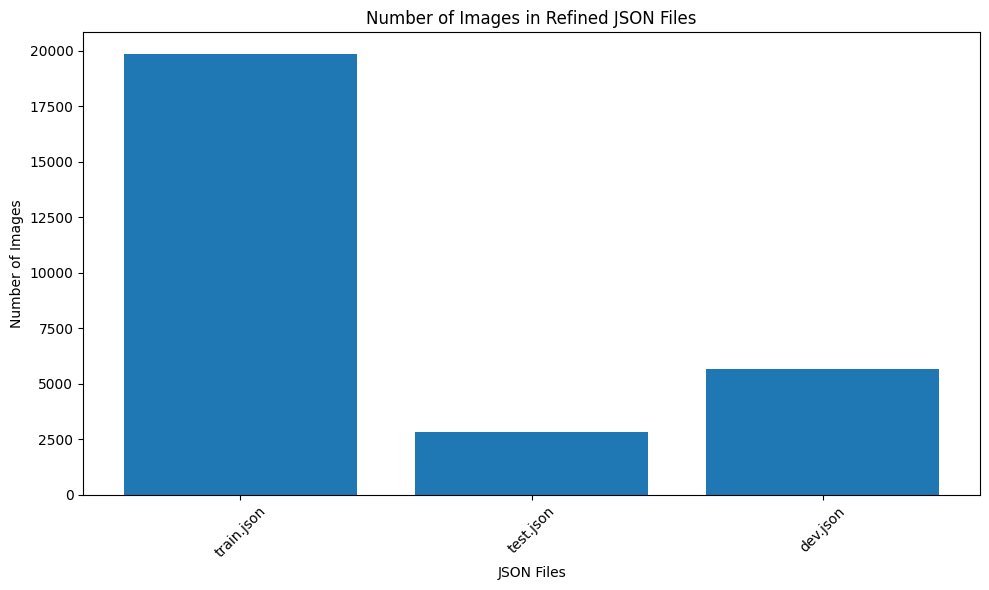

In [14]:
import matplotlib.pyplot as plt

# Function to count the number of images in each JSON file
def count_images_in_json(json_dir):
    """
    Count the number of images in each JSON file in the specified directory.
    
    Args:
        json_dir (str): Path to the directory containing JSON files
        
    Returns:
        dict: Dictionary with file names as keys and image counts as values
    """
    image_counts = {}
    json_files = [f for f in os.listdir(json_dir) if f.endswith('.json')]
    
    for json_file in tqdm(json_files, desc="Processing JSON files"):
        file_path = os.path.join(json_dir, json_file)
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
                image_counts[json_file] = len(data)
        except Exception as e:
            print(f"Error processing {json_file}: {e}")
    
    return image_counts

# Count images in refined JSON files
refined_json_dir = os.path.join(os.path.dirname(json_data_dir), 'refined_json')
image_counts = count_images_in_json(refined_json_dir)

# Print the results
print("\nNumber of images in each refined JSON file:")
total_images = 0
for file, count in image_counts.items():
    print(f"- {file}: {count} images")
    total_images += count

print(f"\nTotal number of images across all files: {total_images}")

# Optional: Create a bar chart to visualize the distribution
plt.figure(figsize=(10, 6))
plt.bar(image_counts.keys(), image_counts.values())
plt.xlabel('JSON Files')
plt.ylabel('Number of Images')
plt.title('Number of Images in Refined JSON Files')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Processing JSON files: 100%|██████████| 3/3 [00:00<00:00,  7.14it/s]


Average maximum caption length: 14.53 words
Median maximum caption length: 14.00 words
Minimum of maximum caption lengths: 10 words
Maximum of maximum caption lengths: 20 words
Standard deviation of maximum caption lengths: 1.94 words


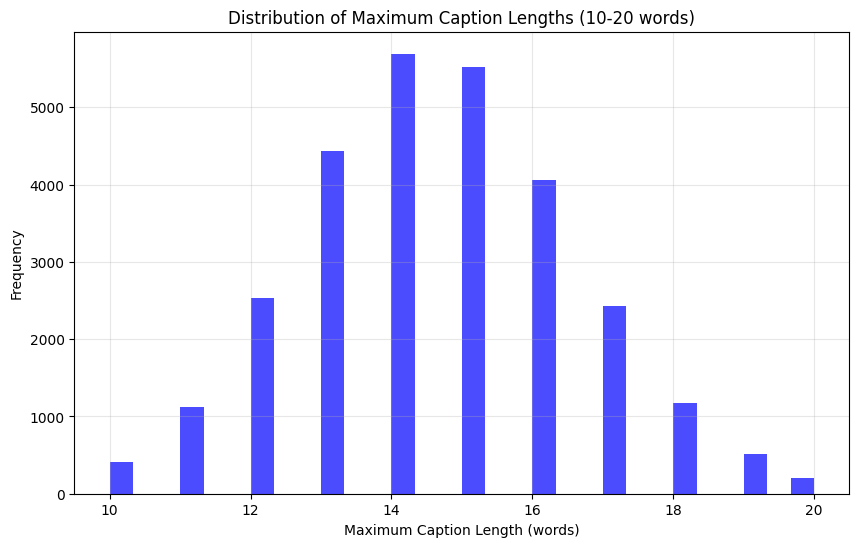

In [1]:
import json
import os
import numpy as np
from tqdm import tqdm

# Path to the JSON data directory
json_data_dir = '/home/researcher/huypq69/2ndrun/TuningModels/json_data'
# Path to save refined JSON files
refined_json_dir = '/home/researcher/huypq69/2ndrun/TuningModels/refined_json'

# Create refined_json directory if it doesn't exist
os.makedirs(refined_json_dir, exist_ok=True)

# Function to filter and save captions based on length
def filter_and_save_captions(json_dir, output_dir):
    max_lengths = []
    
    # Get all JSON files in the directory
    json_files = [f for f in os.listdir(json_dir) if f.endswith('.json')]
    
    for json_file in tqdm(json_files, desc="Processing JSON files"):
        input_file_path = os.path.join(json_dir, json_file)
        output_file_path = os.path.join(output_dir, json_file)
        
        try:
            # Load the JSON file
            with open(input_file_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
            
            # Handle different JSON formats
            if isinstance(data, list):
                # Format like in test.json: list of dictionaries with "image_path" and "caption" keys
                filtered_data = []
                for item in data:
                    if "caption" in item and item["caption"]:
                        # Filter captions by length (between 10 and 20 words inclusive)
                        filtered_captions = [cap for cap in item["caption"] 
                                            if 10 <= len(cap.split()) <= 20]
                        if filtered_captions:
                            new_item = item.copy()
                            new_item["caption"] = filtered_captions
                            filtered_data.append(new_item)
                            # Get the length of each caption (in words)
                            caption_lengths = [len(caption.split()) for caption in filtered_captions]
                            # Store the maximum length for this image
                            max_lengths.append(max(caption_lengths))
                
                # Save the filtered data
                with open(output_file_path, 'w', encoding='utf-8') as f:
                    json.dump(filtered_data, f, ensure_ascii=False, indent=2)
                    
            elif isinstance(data, dict):
                # Format like in the previous code: dictionary with image_id keys
                filtered_data = {}
                for image_id, image_data in data.items():
                    if 'captions' in image_data and image_data['captions']:
                        # Filter captions by length (between 10 and 20 words inclusive)
                        filtered_captions = [cap for cap in image_data['captions'] 
                                            if 10 <= len(cap.split()) <= 20]
                        if filtered_captions:
                            filtered_data[image_id] = image_data.copy()
                            filtered_data[image_id]['captions'] = filtered_captions
                            # Get the length of each caption (in words)
                            caption_lengths = [len(caption.split()) for caption in filtered_captions]
                            # Store the maximum length for this image
                            max_lengths.append(max(caption_lengths))
                
                # Save the filtered data
                with open(output_file_path, 'w', encoding='utf-8') as f:
                    json.dump(filtered_data, f, ensure_ascii=False, indent=2)
        
        except Exception as e:
            print(f"Error processing {json_file}: {e}")
    
    # Calculate statistics
    if max_lengths:
        avg_max_length = np.mean(max_lengths)
        median_max_length = np.median(max_lengths)
        min_max_length = np.min(max_lengths)
        max_max_length = np.max(max_lengths)
        std_max_length = np.std(max_lengths)
        
        print(f"Average maximum caption length: {avg_max_length:.2f} words")
        print(f"Median maximum caption length: {median_max_length:.2f} words")
        print(f"Minimum of maximum caption lengths: {min_max_length} words")
        print(f"Maximum of maximum caption lengths: {max_max_length} words")
        print(f"Standard deviation of maximum caption lengths: {std_max_length:.2f} words")
        
        # Plot histogram of max lengths
        try:
            import matplotlib.pyplot as plt
            plt.figure(figsize=(10, 6))
            plt.hist(max_lengths, bins=30, alpha=0.7, color='blue')
            plt.title('Distribution of Maximum Caption Lengths (10-20 words)')
            plt.xlabel('Maximum Caption Length (words)')
            plt.ylabel('Frequency')
            plt.grid(True, alpha=0.3)
            plt.show()
        except ImportError:
            print("Matplotlib not available for plotting histogram")
        
        return avg_max_length, max_lengths
    else:
        print("No captions found in the JSON files")
        return None, []

# Run the filtering and calculation
avg_max_length, all_max_lengths = filter_and_save_captions(json_data_dir, refined_json_dir)


Processing JSON files: 100%|██████████| 3/3 [00:00<00:00, 68.91it/s]


Image-Text Pair Analysis:

train.json:
  Number of unique images: 3969
  Total number of captions: 19661
  Average captions per image: 4.95
  Min captions per image: 2
  Max captions per image: 5

test.json:
  Number of unique images: 569
  Total number of captions: 2819
  Average captions per image: 4.95
  Min captions per image: 2
  Max captions per image: 5

dev.json:
  Number of unique images: 1133
  Total number of captions: 5621
  Average captions per image: 4.96
  Min captions per image: 3
  Max captions per image: 6


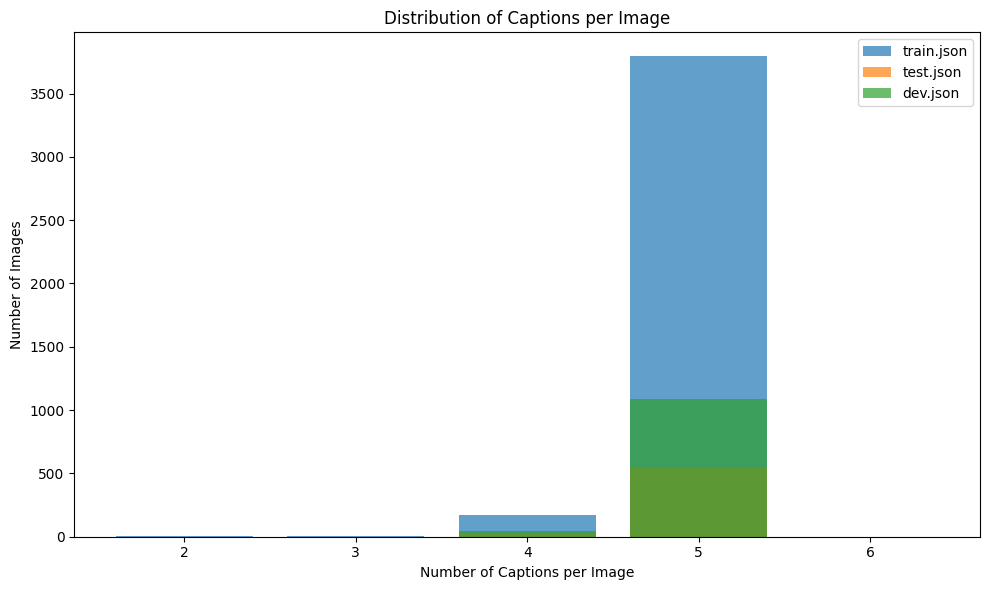

In [6]:
# Check image-text pairs in all JSON files
import json
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

def analyze_image_text_pairs(json_file_path):
    """
    Analyze image-text pairs in a JSON file.
    Returns the number of images, captions, and captions per image statistics.
    """
    try:
        with open(json_file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        
        # Count images and captions
        image_to_captions = {}
        for item in data:
            if 'image_path' in item and 'caption' in item:
                image_path = item['image_path']
                if image_path not in image_to_captions:
                    image_to_captions[image_path] = []
                image_to_captions[image_path].append(item['caption'])
        
        # Calculate statistics
        num_images = len(image_to_captions)
        num_captions = sum(len(captions) for captions in image_to_captions.values())
        captions_per_image = [len(captions) for captions in image_to_captions.values()]
        
        return {
            'num_images': num_images,
            'num_captions': num_captions,
            'avg_captions_per_image': num_captions / num_images if num_images > 0 else 0,
            'min_captions': min(captions_per_image) if captions_per_image else 0,
            'max_captions': max(captions_per_image) if captions_per_image else 0,
            'captions_distribution': captions_per_image
        }
    except Exception as e:
        print(f"Error processing {json_file_path}: {e}")
        return None

# Directory containing JSON files
json_dir = '/home/researcher/huypq69/2ndrun/TuningModels/refined_json'
json_files = [os.path.join(json_dir, f) for f in os.listdir(json_dir) if f.endswith('.json')]

# Analyze each JSON file
results = {}
for json_file in tqdm(json_files, desc="Processing JSON files"):
    file_name = os.path.basename(json_file)
    results[file_name] = analyze_image_text_pairs(json_file)

# Print results
print("\nImage-Text Pair Analysis:")
for file_name, stats in results.items():
    if stats:
        print(f"\n{file_name}:")
        print(f"  Number of unique images: {stats['num_images']}")
        print(f"  Total number of captions: {stats['num_captions']}")
        print(f"  Average captions per image: {stats['avg_captions_per_image']:.2f}")
        print(f"  Min captions per image: {stats['min_captions']}")
        print(f"  Max captions per image: {stats['max_captions']}")

# Visualize caption distribution
plt.figure(figsize=(10, 6))
for file_name, stats in results.items():
    if stats and stats['captions_distribution']:
        # Count frequency of each number of captions
        from collections import Counter
        distribution = Counter(stats['captions_distribution'])
        x = sorted(distribution.keys())
        y = [distribution[k] for k in x]
        plt.bar([str(i) for i in x], y, label=file_name, alpha=0.7)

plt.xlabel('Number of Captions per Image')
plt.ylabel('Number of Images')
plt.title('Distribution of Captions per Image')
plt.legend()
plt.tight_layout()
plt.show()
